Demo to Rutvik Dhopate

In [1]:
import pandas as pd

# Load the text file
file_path = '/Users/hunjunsin/Desktop/Jun/Unsupervised/hw3/household_power_consumption.txt'
df = pd.read_csv(file_path, sep=';')

# Randomly select 50,000 rows
df_sampled = df.sample(n=10000, random_state=1)

# Display the first few rows of the sampled dataframe
print(df_sampled.head())


               Date      Time Global_active_power Global_reactive_power  \
2042128   3/11/2010  20:52:00                1.47                  0.16   
1025196  27/11/2008  16:00:00               0.662                 0.000   
1859043   29/6/2010  17:27:00               0.752                 0.320   
202102     6/5/2007  01:46:00               0.150                 0.000   
640490     5/3/2008  12:14:00               0.218                 0.000   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
2042128   241.73              6.0            0.0            1.0   
1025196  241.480            3.400          0.000          0.000   
1859043  240.040            3.400          0.000          1.000   
202102   237.860            0.600          0.000          0.000   
640490   243.240            0.800          0.000          0.000   

         Sub_metering_3  
2042128             1.0  
1025196             0.0  
1859043             0.0  
202102              0.0  
640490          

/var/folders/5n/z64_841d7zn4lzhk5r1t4m700000gn/T/ipykernel_2032/1275073301.py:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';')


In [2]:
df_sampled.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2042128,3/11/2010,20:52:00,1.47,0.16,241.73,6.0,0.0,1.0,1.0
1025196,27/11/2008,16:00:00,0.662,0.000,241.480,3.400,0.000,0.000,0.0
1859043,29/6/2010,17:27:00,0.752,0.320,240.040,3.400,0.000,1.000,0.0
202102,6/5/2007,01:46:00,0.150,0.000,237.860,0.600,0.000,0.000,0.0
640490,5/3/2008,12:14:00,0.218,0.000,243.240,0.800,0.000,0.000,0.0


In [3]:
df_sampled.drop(columns=['Date', 'Time'], inplace=True)

In [4]:
from sklearn.impute import KNNImputer

df_sampled = df_sampled.apply(pd.to_numeric, errors='coerce')

imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df_sampled), columns=df_sampled.columns)

print(df_imputed.head())

   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                1.470                   0.16   241.73               6.0   
1                0.662                   0.00   241.48               3.4   
2                0.752                   0.32   240.04               3.4   
3                0.150                   0.00   237.86               0.6   
4                0.218                   0.00   243.24               0.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             0.0             1.0             1.0  
1             0.0             0.0             0.0  
2             0.0             1.0             0.0  
3             0.0             0.0             0.0  
4             0.0             0.0             0.0  


In [5]:
df_imputed.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.097691,0.122916,240.802085,4.652946,1.184855,1.307350,6.462644
std,1.054564,0.112779,3.187619,4.431747,6.294649,5.782961,8.384366
min,0.078000,0.000000,227.120000,0.200000,0.000000,0.000000,0.000000
25%,0.308000,0.046000,238.970000,1.400000,0.000000,0.000000,0.000000
50%,0.630000,0.100000,240.900000,2.800000,0.000000,0.000000,1.000000
75%,1.536000,0.196000,242.790000,6.400000,0.000000,1.000000,17.000000
max,8.404000,0.962000,251.680000,36.000000,80.000000,75.000000,31.000000


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

print(df_scaled.head())

   Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
0             0.353063               0.328834  0.291114          0.303971   
1            -0.413168              -1.089943  0.212682         -0.282735   
2            -0.327821               1.747611 -0.239089         -0.282735   
3            -0.898701              -1.089943 -0.923019         -0.914571   
4            -0.834216              -1.089943  0.764846         -0.869440   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0       -0.188242       -0.053150       -0.651560  
1       -0.188242       -0.226081       -0.770836  
2       -0.188242       -0.053150       -0.770836  
3       -0.188242       -0.226081       -0.770836  
4       -0.188242       -0.226081       -0.770836  


In [7]:
df_scaled.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-1.634248e-16,-3.552714e-17,-7.612755e-15,1.094236e-16,8.810730e-17,-7.815970e-18,-2.557954e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-9.669791e-01,-1.089943e+00,-4.292473e+00,-1.004834e+00,-1.882415e-01,-2.260806e-01,-7.708355e-01
25%,-7.488687e-01,-6.820450e-01,-5.747791e-01,-7.340465e-01,-1.882415e-01,-2.260806e-01,-7.708355e-01
50%,-4.435141e-01,-2.032077e-01,3.071868e-02,-4.181282e-01,-1.882415e-01,-2.260806e-01,-6.515600e-01
75%,4.156513e-01,6.480586e-01,6.236673e-01,3.942331e-01,-1.882415e-01,-5.315012e-02,1.256849e+00
max,6.928618e+00,7.440454e+00,3.412722e+00,7.073648e+00,1.252160e+01,1.274370e+01,2.926707e+00


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def compute_k_distance_euclidean_chunk(X, k, batch_size=1000):

    n = len(X)
    k_distances = np.zeros(n, dtype=float)

    for start in tqdm(range(0, n, batch_size), desc="k-distance - chunk loop"):
        end = min(start + batch_size, n)

        X_chunk = X[start:end]  

        chunk_diff = X_chunk[:, np.newaxis, :] - X[np.newaxis, :, :]

        chunk_dist_sq = np.sum(chunk_diff**2, axis=2)
        chunk_distance = np.sqrt(chunk_dist_sq)

        for i_local, row_distances in enumerate(chunk_distance):
            i_global = start + i_local
            kth_dist = np.partition(row_distances, k-1)[k-1]
            k_distances[i_global] = kth_dist

    return k_distances

def plot_k_distance(k_distances):

    k_distances_sorted = np.sort(k_distances)
    plt.figure(figsize=(6,4))
    plt.plot(k_distances_sorted)
    plt.xlabel("Points (sorted by distance)")
    plt.ylabel("k-distance (euclidean)")
    plt.title("k-distance Graph")
    plt.grid(True)
    plt.show()

In [9]:
scaled_input = df_scaled.to_numpy()
scaled_input.shape

(10000, 7)

Computing k-distance (Euclidean) in chunks...


k-distance - chunk loop: 100%|██████████| 10/10 [00:03<00:00,  3.15it/s]


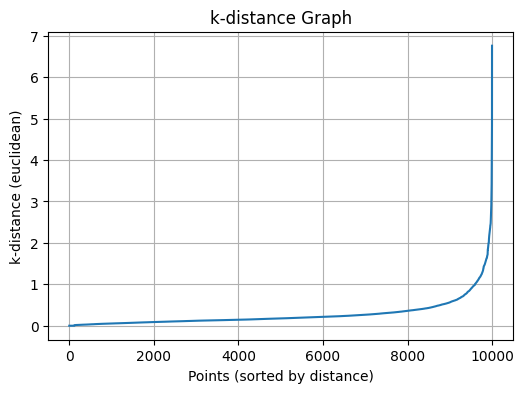

In [26]:
distance_matrix = compute_k_distance_euclidean_chunk(scaled_input, k=5, batch_size=1000)
plot_k_distance(distance_matrix)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from tqdm import tqdm

def dbscan_core_first_euclidean_manual_batch(X, eps, min_pts, batch_size=1000):
    n = len(X)
    
    labels = np.zeros(n, dtype=int)
    visited = np.zeros(n, dtype=bool)
    is_core = np.zeros(n, dtype=bool)
    neighbors_list = [[] for _ in range(n)]
    
    for start in tqdm(range(0, n, batch_size), desc="Precomputing neighbors"):
        end = min(start + batch_size, n)
        X_chunk = X[start:end]
        
        chunk_diff = X_chunk[:, np.newaxis, :] - X[np.newaxis, :, :]
        chunk_distance = np.sqrt(np.sum(chunk_diff**2, axis=2))
        
        for i_local, row_distances in enumerate(chunk_distance):
            i_global = start + i_local
            neighbor_indices = np.where(row_distances <= eps)[0]
            neighbors_list[i_global] = list(set(neighbor_indices.tolist()))
    
    # Core point 및 noise point 판별
    for i in range(n):
        if len(neighbors_list[i]) >= min_pts:
            is_core[i] = True
        else:
            labels[i] = -1  # Noise point
            # visited[i] = True
    
    def expand_cluster_core(core_idx, cluster_id):
        labels[core_idx] = cluster_id
        seed_queue = set(neighbors_list[core_idx])
        while seed_queue:
            current_pt = seed_queue.pop()
            if not visited[current_pt]:
                visited[current_pt] = True
                if is_core[current_pt]:
                    seed_queue.update(neighbors_list[current_pt])
            if labels[current_pt] in [0,-1]:
                labels[current_pt] = cluster_id
    
    # 클러스터 확장
    cluster_id = 0
    for i in tqdm(range(n), desc="Expanding clusters"):
        if is_core[i] and not visited[i]:
            cluster_id += 1
            visited[i] = True
            expand_cluster_core(i, cluster_id)
    
    return labels

In [13]:
import numpy as np
from sklearn.metrics import silhouette_score

eps_candidates = [0.5, 1, 1.5, 2]

for eps_val in eps_candidates:
    print(f"\n=== DBSCAN with eps={eps_val} ===")
    labels = dbscan_core_first_euclidean_manual_batch(
        scaled_input,  
        eps=eps_val,
        min_pts=5,
        batch_size=100
    )
    
    print("DBSCAN Finished.")
    unique_labels = np.unique(labels)
    # print("Unique labels:", unique_labels)
    unique_valid_labels, valid_counts = np.unique(labels, return_counts=True)

    print("\n=== Cluster counts (excluding noise/unassigned) ===")
    for cluster_id, count in zip(unique_valid_labels, valid_counts):
        print(f"Cluster {cluster_id}: {count} points")
    
    mask = (labels != -1) & (labels != 0)
    valid_labels = labels[mask]
    
    n_clusters = len(set(valid_labels))
    print("Number of clusters (excluding noise & 0):", n_clusters)
    

    if n_clusters >= 2:
        X_valid = scaled_input[mask]
        sil_score = silhouette_score(X_valid, valid_labels)
        print(f"Silhouette score (eps={eps_val}): {sil_score:.4f}")
    else:
        print("Not enough clusters to compute a Silhouette score.")


=== DBSCAN with eps=0.5 ===


Expanding clusters: 100%|██████████| 10000/10000 [00:00<00:00, 215332.14it/s]


DBSCAN Finished.

=== Cluster counts (excluding noise/unassigned) ===
Cluster -1: 943 points
Cluster 1: 8786 points
Cluster 2: 122 points
Cluster 3: 40 points
Cluster 4: 8 points
Cluster 5: 11 points
Cluster 6: 4 points
Cluster 7: 7 points
Cluster 8: 5 points
Cluster 9: 23 points
Cluster 10: 8 points
Cluster 11: 8 points
Cluster 12: 5 points
Cluster 13: 5 points
Cluster 14: 7 points
Cluster 15: 5 points
Cluster 16: 8 points
Cluster 17: 5 points
Number of clusters (excluding noise & 0): 17
Silhouette score (eps=0.5): -0.2440

=== DBSCAN with eps=1 ===


Expanding clusters: 100%|██████████| 10000/10000 [00:00<00:00, 60105.21it/s]


DBSCAN Finished.

=== Cluster counts (excluding noise/unassigned) ===
Cluster -1: 281 points
Cluster 1: 9374 points
Cluster 2: 129 points
Cluster 3: 96 points
Cluster 4: 72 points
Cluster 5: 33 points
Cluster 6: 6 points
Cluster 7: 9 points
Number of clusters (excluding noise & 0): 7
Silhouette score (eps=1): 0.5303

=== DBSCAN with eps=1.5 ===


Expanding clusters: 100%|██████████| 10000/10000 [00:00<00:00, 25039.44it/s]


DBSCAN Finished.

=== Cluster counts (excluding noise/unassigned) ===
Cluster -1: 102 points
Cluster 1: 9662 points
Cluster 2: 231 points
Cluster 3: 5 points
Number of clusters (excluding noise & 0): 3
Silhouette score (eps=1.5): 0.6356

=== DBSCAN with eps=2 ===


Expanding clusters: 100%|██████████| 10000/10000 [00:00<00:00, 12636.30it/s]


DBSCAN Finished.

=== Cluster counts (excluding noise/unassigned) ===
Cluster -1: 38 points
Cluster 1: 9938 points
Cluster 2: 11 points
Cluster 3: 8 points
Cluster 4: 5 points
Number of clusters (excluding noise & 0): 4
Silhouette score (eps=2): 0.7082


k-distance - chunk loop: 100%|██████████| 10/10 [00:04<00:00,  2.06it/s]


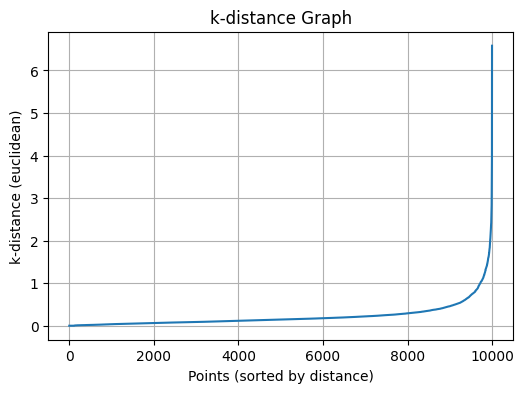

In [14]:
distance_matrix = compute_k_distance_euclidean_chunk(scaled_input, k=3, batch_size=1000)
plot_k_distance(distance_matrix)

In [15]:
import numpy as np
from sklearn.metrics import silhouette_score

eps_candidates = [0.2, 0.3, 0.5, 0.7, 1, 1.3, 1.5, 2]

for eps_val in eps_candidates:
    print(f"\n=== DBSCAN with eps={eps_val} ===")
    labels = dbscan_core_first_euclidean_manual_batch(
        scaled_input,  
        eps=eps_val,
        min_pts=3,
        batch_size=100
    )
    
    print("DBSCAN Finished.")
    unique_labels = np.unique(labels)
    # print("Unique labels:", unique_labels)
    unique_valid_labels, valid_counts = np.unique(labels, return_counts=True)

    print("\n=== Cluster counts (excluding noise/unassigned) ===")
    for cluster_id, count in zip(unique_valid_labels, valid_counts):
        print(f"Cluster {cluster_id}: {count} points")
    
    mask = (labels != -1) & (labels != 0)
    valid_labels = labels[mask]
    
    n_clusters = len(set(valid_labels))
    print("Number of clusters (excluding noise & 0):", n_clusters)
    

    if n_clusters >= 2:
        X_valid = scaled_input[mask]
        sil_score = silhouette_score(X_valid, valid_labels)
        print(f"Silhouette score (eps={eps_val}): {sil_score:.4f}")
    else:
        print("Not enough clusters to compute a Silhouette score.")


=== DBSCAN with eps=0.2 ===


Expanding clusters: 100%|██████████| 10000/10000 [00:00<00:00, 753937.30it/s]


DBSCAN Finished.

=== Cluster counts (excluding noise/unassigned) ===
Cluster -1: 3010 points
Cluster 1: 1549 points
Cluster 2: 3300 points
Cluster 3: 476 points
Cluster 4: 1016 points
Cluster 5: 10 points
Cluster 6: 3 points
Cluster 7: 4 points
Cluster 8: 3 points
Cluster 9: 14 points
Cluster 10: 122 points
Cluster 11: 6 points
Cluster 12: 7 points
Cluster 13: 5 points
Cluster 14: 18 points
Cluster 15: 4 points
Cluster 16: 4 points
Cluster 17: 8 points
Cluster 18: 4 points
Cluster 19: 3 points
Cluster 20: 3 points
Cluster 21: 15 points
Cluster 22: 21 points
Cluster 23: 6 points
Cluster 24: 6 points
Cluster 25: 4 points
Cluster 26: 5 points
Cluster 27: 3 points
Cluster 28: 3 points
Cluster 29: 3 points
Cluster 30: 6 points
Cluster 31: 4 points
Cluster 32: 4 points
Cluster 33: 3 points
Cluster 34: 4 points
Cluster 35: 3 points
Cluster 36: 6 points
Cluster 37: 6 points
Cluster 38: 3 points
Cluster 39: 6 points
Cluster 40: 3 points
Cluster 41: 5 points
Cluster 42: 4 points
Cluster 43: 4 p

Expanding clusters: 100%|██████████| 10000/10000 [00:00<00:00, 434404.32it/s]


DBSCAN Finished.

=== Cluster counts (excluding noise/unassigned) ===
Cluster -1: 1637 points
Cluster 1: 3920 points
Cluster 2: 1641 points
Cluster 3: 3 points
Cluster 4: 6 points
Cluster 5: 577 points
Cluster 6: 1589 points
Cluster 7: 3 points
Cluster 8: 7 points
Cluster 9: 4 points
Cluster 10: 8 points
Cluster 11: 122 points
Cluster 12: 58 points
Cluster 13: 3 points
Cluster 14: 3 points
Cluster 15: 6 points
Cluster 16: 8 points
Cluster 17: 28 points
Cluster 18: 4 points
Cluster 19: 8 points
Cluster 20: 9 points
Cluster 21: 8 points
Cluster 22: 6 points
Cluster 23: 10 points
Cluster 24: 3 points
Cluster 25: 12 points
Cluster 26: 3 points
Cluster 27: 4 points
Cluster 28: 9 points
Cluster 29: 3 points
Cluster 30: 6 points
Cluster 31: 3 points
Cluster 32: 4 points
Cluster 33: 9 points
Cluster 34: 8 points
Cluster 35: 3 points
Cluster 36: 7 points
Cluster 37: 16 points
Cluster 38: 12 points
Cluster 39: 4 points
Cluster 40: 4 points
Cluster 41: 6 points
Cluster 42: 14 points
Cluster 43: 7

Expanding clusters: 100%|██████████| 10000/10000 [00:00<00:00, 204900.05it/s]


DBSCAN Finished.

=== Cluster counts (excluding noise/unassigned) ===
Cluster -1: 729 points
Cluster 1: 8886 points
Cluster 2: 42 points
Cluster 3: 8 points
Cluster 4: 122 points
Cluster 5: 3 points
Cluster 6: 4 points
Cluster 7: 3 points
Cluster 8: 11 points
Cluster 9: 3 points
Cluster 10: 3 points
Cluster 11: 12 points
Cluster 12: 3 points
Cluster 13: 4 points
Cluster 14: 3 points
Cluster 15: 4 points
Cluster 16: 3 points
Cluster 17: 35 points
Cluster 18: 15 points
Cluster 19: 3 points
Cluster 20: 5 points
Cluster 21: 3 points
Cluster 22: 8 points
Cluster 23: 3 points
Cluster 24: 4 points
Cluster 25: 5 points
Cluster 26: 7 points
Cluster 27: 4 points
Cluster 28: 4 points
Cluster 29: 5 points
Cluster 30: 3 points
Cluster 31: 3 points
Cluster 32: 7 points
Cluster 33: 4 points
Cluster 34: 3 points
Cluster 35: 3 points
Cluster 36: 3 points
Cluster 37: 3 points
Cluster 38: 3 points
Cluster 39: 3 points
Cluster 40: 4 points
Cluster 41: 4 points
Cluster 42: 3 points
Cluster 43: 3 points
Clu

Expanding clusters: 100%|██████████| 10000/10000 [00:00<00:00, 125319.82it/s]


DBSCAN Finished.

=== Cluster counts (excluding noise/unassigned) ===
Cluster -1: 437 points
Cluster 1: 9296 points
Cluster 2: 72 points
Cluster 3: 49 points
Cluster 4: 12 points
Cluster 5: 13 points
Cluster 6: 5 points
Cluster 7: 6 points
Cluster 8: 3 points
Cluster 9: 4 points
Cluster 10: 25 points
Cluster 11: 16 points
Cluster 12: 12 points
Cluster 13: 4 points
Cluster 14: 6 points
Cluster 15: 3 points
Cluster 16: 4 points
Cluster 17: 4 points
Cluster 18: 3 points
Cluster 19: 4 points
Cluster 20: 4 points
Cluster 21: 4 points
Cluster 22: 5 points
Cluster 23: 3 points
Cluster 24: 3 points
Cluster 25: 3 points
Number of clusters (excluding noise & 0): 25
Silhouette score (eps=0.7): 0.3583

=== DBSCAN with eps=1 ===


Expanding clusters: 100%|██████████| 10000/10000 [00:00<00:00, 63784.03it/s]


DBSCAN Finished.

=== Cluster counts (excluding noise/unassigned) ===
Cluster -1: 228 points
Cluster 1: 9382 points
Cluster 2: 131 points
Cluster 3: 100 points
Cluster 4: 73 points
Cluster 5: 42 points
Cluster 6: 3 points
Cluster 7: 3 points
Cluster 8: 9 points
Cluster 9: 8 points
Cluster 10: 5 points
Cluster 11: 3 points
Cluster 12: 6 points
Cluster 13: 3 points
Cluster 14: 4 points
Number of clusters (excluding noise & 0): 14
Silhouette score (eps=1): 0.2798

=== DBSCAN with eps=1.3 ===


Expanding clusters: 100%|██████████| 10000/10000 [00:00<00:00, 37000.45it/s]


DBSCAN Finished.

=== Cluster counts (excluding noise/unassigned) ===
Cluster -1: 119 points
Cluster 1: 9637 points
Cluster 2: 229 points
Cluster 3: 4 points
Cluster 4: 3 points
Cluster 5: 5 points
Cluster 6: 3 points
Number of clusters (excluding noise & 0): 6
Silhouette score (eps=1.3): 0.5980

=== DBSCAN with eps=1.5 ===


Expanding clusters: 100%|██████████| 10000/10000 [00:00<00:00, 28522.86it/s]


DBSCAN Finished.

=== Cluster counts (excluding noise/unassigned) ===
Cluster -1: 69 points
Cluster 1: 9903 points
Cluster 2: 8 points
Cluster 3: 5 points
Cluster 4: 3 points
Cluster 5: 3 points
Cluster 6: 3 points
Cluster 7: 3 points
Cluster 8: 3 points
Number of clusters (excluding noise & 0): 8
Silhouette score (eps=1.5): 0.4716

=== DBSCAN with eps=2 ===


Expanding clusters: 100%|██████████| 10000/10000 [00:00<00:00, 11880.05it/s]


DBSCAN Finished.

=== Cluster counts (excluding noise/unassigned) ===
Cluster -1: 26 points
Cluster 1: 9938 points
Cluster 2: 13 points
Cluster 3: 3 points
Cluster 4: 14 points
Cluster 5: 3 points
Cluster 6: 3 points
Number of clusters (excluding noise & 0): 6
Silhouette score (eps=2): 0.4783
